In [1]:
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# Data preprocessing
def load_and_preprocess_data(data_dir):
    images = []
    labels = []
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (32, 32))  # Resize to 32x32
                img = img / 255.0  # Normalize
                images.append(img)
                labels.append(int(class_dir))
    return np.array(images), np.array(labels)


In [3]:
# Load data (assuming GTSRB dataset structure)
data_dir = "dataset\Train"
X, y = load_and_preprocess_data(data_dir)

In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)
datagen.fit(X_train)

In [6]:
# Custom CNN model
custom_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

custom_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_custom = custom_cnn.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

c:\Users\hafee\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


c:\Users\hafee\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.3251 - loss: 2.3603 - val_accuracy: 0.6788 - val_loss: 1.0244
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.5601 - loss: 1.3486 - val_accuracy: 0.8193 - val_loss: 0.5836
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.6577 - loss: 1.0298 - val_accuracy: 0.8888 - val_loss: 0.3827
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.7165 - loss: 0.8408 - val_accuracy: 0.9223 - val_loss: 0.2678
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.7612 - loss: 0.7152 - val_accuracy: 0.9536 - val_loss: 0.2254
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.7943 - loss: 0.6153 - val_accuracy: 0.9560 - val_loss: 0.1430
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8240 - loss: 0.5372 - val_accuracy: 0.9767 - val_loss: 0.1013
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8452 - loss: 0.4740 - val_accurac

In [7]:
# Pre-trained MobileNet model
try:
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
except Exception as e:
    print(f"Failed to load pre-trained weights: {e}. Training MobileNet from scratch.")
    base_model = MobileNet(weights=None, include_top=False, input_shape=(32, 32, 3))

mobilenet_model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')
])

mobilenet_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_mobilenet = mobilenet_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

C:\Users\hafee\AppData\Local\Temp\ipykernel_14128\3515789058.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 116s 109ms/step - accuracy: 0.4140 - loss: 2.0856 - val_accuracy: 0.6137 - val_loss: 1.1751
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 104s 106ms/step - accuracy: 0.6592 - loss: 1.1200 - val_accuracy: 0.6793 - val_loss: 1.0397
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 104s 106ms/step - accuracy: 0.7670 - loss: 0.7995 - val_accuracy: 0.8758 - val_loss: 0.3604
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 108s 110ms/step - accuracy: 0.8358 - loss: 0.5834 - val_accuracy: 0.8962 - val_loss: 0.3211
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 105s 107ms/step - accuracy: 0.8807 - loss: 0.4449 - val_accuracy: 0.9435 - val_loss: 0.1956
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 99s 101ms/step - accuracy: 0.9033 - loss: 0.3696 - val_accuracy: 0.9578 - val_loss: 0.1435
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 100s 102ms/step - accuracy: 0.9193 - loss: 0.3108 - val_accuracy: 0.9513 - val_loss: 0.1972
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 99s 101ms/step - accuracy: 0.9253 - l

In [8]:
# Evaluate models
y_pred_custom = np.argmax(custom_cnn.predict(X_test), axis=1)
y_pred_mobilenet = np.argmax(mobilenet_model.predict(X_test), axis=1)

acc_custom = accuracy_score(y_test, y_pred_custom)
acc_mobilenet = accuracy_score(y_test, y_pred_mobilenet)
print(f"Custom CNN Accuracy: {acc_custom}")
print(f"MobileNet Accuracy: {acc_mobilenet}")

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
246/246 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step
Custom CNN Accuracy: 0.9855904106095383
MobileNet Accuracy: 0.9724560061208876


In [9]:
# Compute confusion matrices
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
conf_matrix_mobilenet = confusion_matrix(y_test, y_pred_mobilenet)

In [10]:
# Function to calculate TP, TN, FP, FN for each class
def calculate_metrics(conf_matrix, num_classes):
    metrics = []
    for i in range(num_classes):
        TP = conf_matrix[i, i]
        FP = conf_matrix[:, i].sum() - TP
        FN = conf_matrix[i, :].sum() - TP
        TN = conf_matrix.sum() - (TP + FP + FN)
        metrics.append([i, TP, TN, FP, FN])
    return metrics

num_classes = len(np.unique(y))
metrics_custom = calculate_metrics(conf_matrix_custom, num_classes)
metrics_mobilenet = calculate_metrics(conf_matrix_mobilenet, num_classes)

In [11]:
# Display confusion matrices with TP, TN, FP, FN
print("\nCustom CNN Metrics (TP, TN, FP, FN per class):")
print(tabulate(metrics_custom, headers=["Class", "TP", "TN", "FP", "FN"], tablefmt="grid"))

print("\nMobileNet Metrics (TP, TN, FP, FN per class):")
print(tabulate(metrics_mobilenet, headers=["Class", "TP", "TN", "FP", "FN"], tablefmt="grid"))


Custom CNN Metrics (TP, TN, FP, FN per class):
+---------+------+------+------+------+
|   Class |   TP |   TN |   FP |   FN |
+=========+======+======+======+======+
|       0 |   34 | 7804 |    0 |    4 |
+---------+------+------+------+------+
|       1 |  488 | 7340 |    6 |    8 |
+---------+------+------+------+------+
|       2 |  412 | 7417 |    5 |    8 |
+---------+------+------+------+------+
|       3 |  283 | 7546 |    2 |   11 |
+---------+------+------+------+------+
|       4 |  399 | 7440 |    2 |    1 |
+---------+------+------+------+------+
|       5 |  345 | 7459 |   19 |   19 |
+---------+------+------+------+------+
|       6 |   69 | 7773 |    0 |    0 |
+---------+------+------+------+------+
|       7 |  281 | 7523 |    6 |   32 |
+---------+------+------+------+------+
|       8 |  273 | 7523 |   45 |    1 |
+---------+------+------+------+------+
|       9 |  275 | 7565 |    0 |    2 |
+---------+------+------+------+------+
|      10 |  398 | 7442 |    2 |

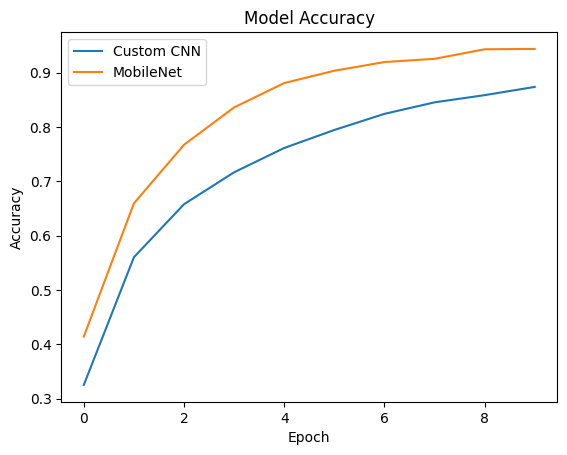

In [12]:
# Plot accuracy
plt.plot(history_custom.history['accuracy'], label='Custom CNN')
plt.plot(history_mobilenet.history['accuracy'], label='MobileNet')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

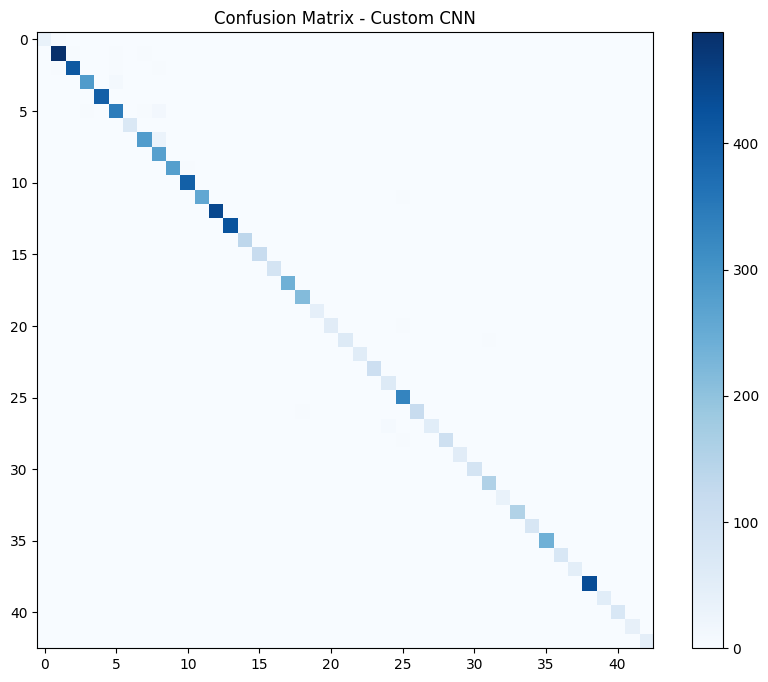

In [13]:
# Plot confusion matrix for Custom CNN
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix_custom, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Custom CNN')
plt.colorbar()
plt.show()

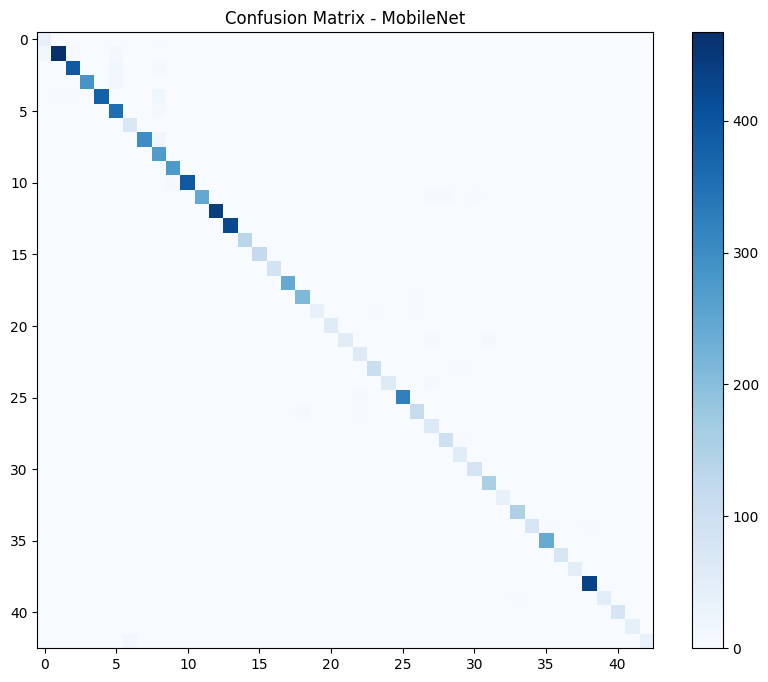

In [14]:
# Plot confusion matrix for MobileNet
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix_mobilenet, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - MobileNet')
plt.colorbar()
plt.show()

In [15]:
# Tabular comparison
comparison_data = [
    ["Model", "Accuracy"],
    ["Custom CNN", acc_custom],
    ["MobileNet", acc_mobilenet]
]
print(tabulate(comparison_data, headers="firstrow", tablefmt="grid"))

+------------+------------+
| Model      |   Accuracy |
+============+============+
| Custom CNN |   0.98559  |
+------------+------------+
| MobileNet  |   0.972456 |
+------------+------------+
